## <font size=5> <strong>Heart Disease Prediction 

##  Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import os
import math
import numpy as np 
from sklearn.metrics import precision_score
from sklearn .metrics import roc_auc_score 
import warnings
warnings.filterwarnings('ignore')

##  Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("combined_dataset.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(1212, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
367,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
757,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
440,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
1192,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
429,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.070845,0.465433,1.030773,17.516406,51.766511,0.355756,0.525208,22.876772,0.469212,1.159636,0.615462,1.021339,0.611518,0.498217
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1212 non-null   int64  
 1   sex       1212 non-null   int64  
 2   cp        1212 non-null   int64  
 3   trestbps  1212 non-null   int64  
 4   chol      1212 non-null   int64  
 5   fbs       1212 non-null   int64  
 6   restecg   1212 non-null   int64  
 7   thalach   1212 non-null   int64  
 8   exang     1212 non-null   int64  
 9   oldpeak   1212 non-null   float64
 10  slope     1212 non-null   int64  
 11  ca        1212 non-null   int64  
 12  thal      1212 non-null   int64  
 13  target    1212 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 132.7 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    1212.000000
mean        0.544554
std         0.498217
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

#### This is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

In [14]:
x=dataset[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

### First, analysing the target variable:

1    660
0    552
Name: target, dtype: int64


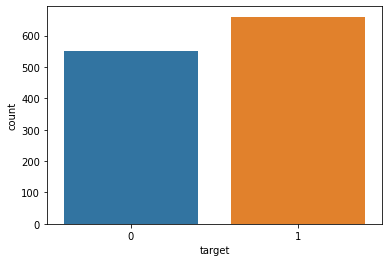

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1212,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1212,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

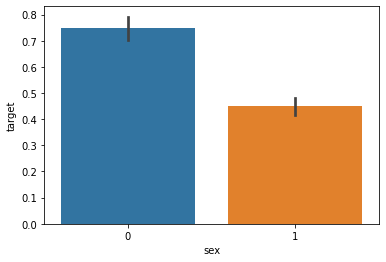

In [18]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

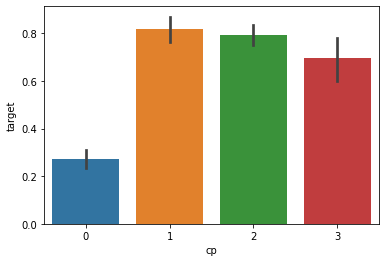

In [20]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    1212.000000
mean        0.148515
std         0.355756
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='target'>

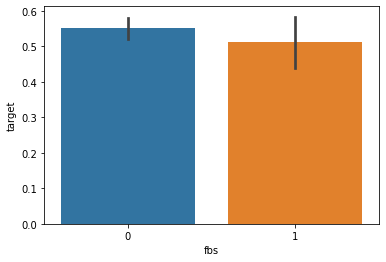

In [23]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='restecg', ylabel='target'>

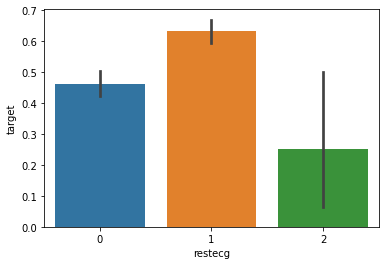

In [25]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1])

<AxesSubplot:xlabel='exang', ylabel='target'>

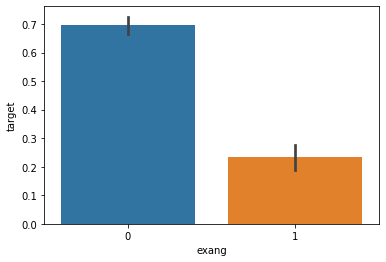

In [27]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='slope', ylabel='target'>

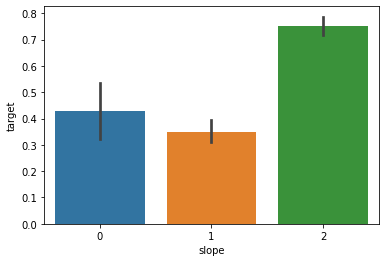

In [29]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<AxesSubplot:xlabel='ca', ylabel='count'>

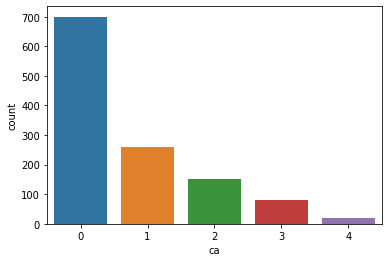

In [32]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

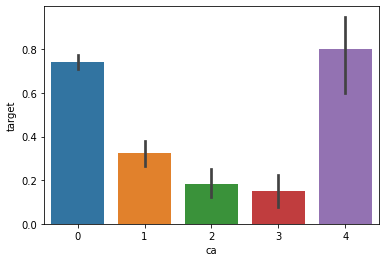

In [33]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [34]:
### Analysing the 'thal' feature

In [35]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='thal', ylabel='target'>

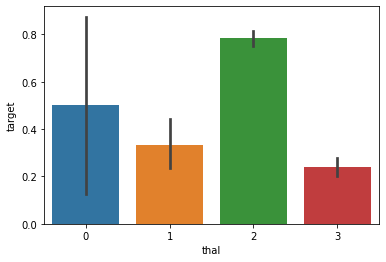

In [36]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

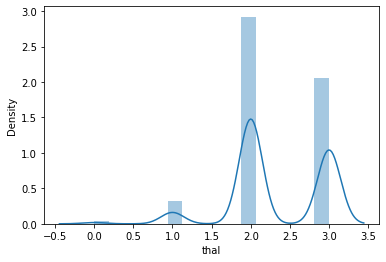

In [37]:
sns.distplot(dataset["thal"])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

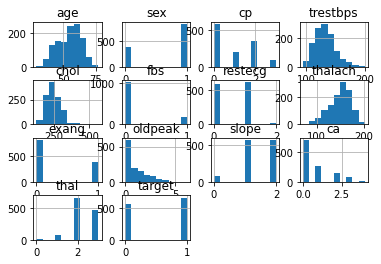

In [38]:
dataset.hist()

## IV. Train Test split

In [39]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [40]:
X_train.shape

(969, 13)

In [41]:
X_test.shape

(243, 13)

In [42]:
Y_train.shape

(969,)

In [43]:
Y_test.shape

(243,)

# Feature Selection

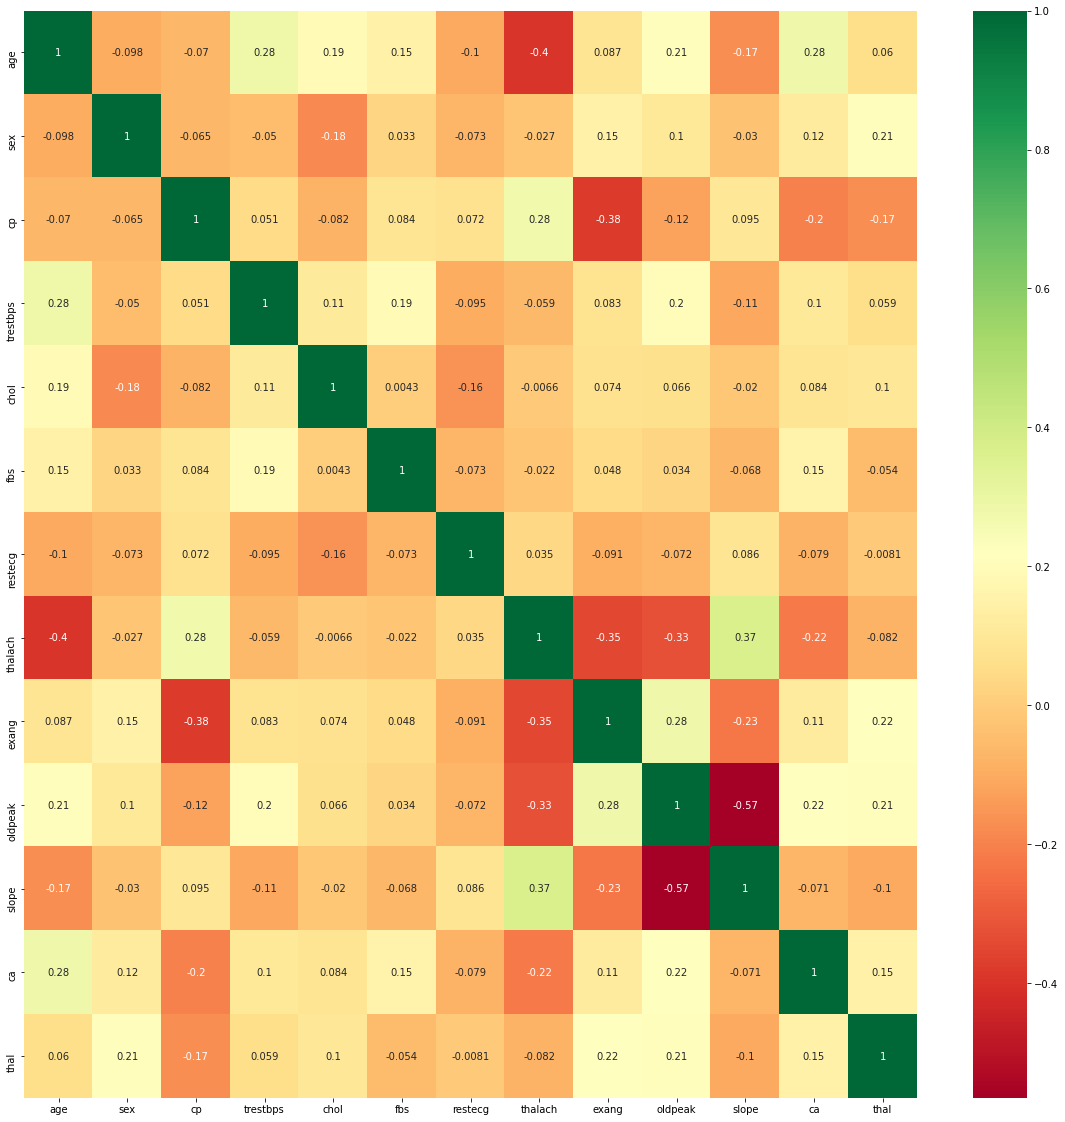

In [44]:
import seaborn as sns
#get correlations of each features in dataset
cor = X_train.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(cor,annot=True,cmap="RdYlGn")

In [45]:
def correlation(dataset,threshold):
    col_corr=set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:  #we are interested in absolute coeff value
                colname=corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

0

In [47]:
corr_features

set()

In [48]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
1009,42,1,3,148,244,0,0,178,0,0.8,2,2,2
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
743,62,1,1,128,208,1,0,140,0,0.0,2,0,2
907,57,1,0,130,131,0,1,115,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,54,0,2,135,304,1,1,170,0,0.0,2,0,2
1042,41,1,1,110,235,0,1,153,0,0.0,2,0,2
580,57,1,1,124,261,0,1,141,0,0.3,2,0,3
995,68,1,2,118,277,0,1,151,0,1.0,2,1,3


## V. Model Fitting

In [49]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import time
start=time.time()
lr = LogisticRegression()

score_ln=cross_val_score(lr,x,y,cv=10,scoring='accuracy').mean()
score_lr = round(score_ln*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
end=time.time()
processingtime_lr=end-start
print(processingtime_lr)

The accuracy score achieved using Logistic Regression is: 85.14 %
1.0854194164276123


### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
start=time.time()
nb = GaussianNB()

score_nb=cross_val_score(nb,x,y,cv=10,scoring='accuracy').mean()
score_nb = round(score_nb*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
end=time.time()
processingtime_nb=end-start
print(processingtime_nb)

The accuracy score achieved using Naive Bayes is: 83.17 %
0.09516310691833496


### SVM

In [52]:
from sklearn import svm
start=time.time()
sv = svm.SVC(kernel='linear')

score_svm=cross_val_score(sv,x,y,cv=10,scoring='accuracy').mean()
score_svm = round(score_svm*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
end=time.time()
processingtime_svm=end-start
print(processingtime_svm)

The accuracy score achieved using Linear SVM is: 85.97 %
60.17371344566345


### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
start=time.time()
knn = KNeighborsClassifier(n_neighbors=7)
score_knn = cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()
score_knn = round(score_knn*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
end=time.time()
processingtime_knn=end-start
print(processingtime_knn)

The accuracy score achieved using KNN is: 67.16 %
0.12339925765991211


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
start=time.time()
max_accuracy = 0


for p in range(50):
    rf = RandomForestClassifier(random_state=p)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = p
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
score_rf=cross_val_score(rf,x,y,cv=10,scoring='accuracy').mean()
score_rf = round(score_rf*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
end=time.time()
processingtime_rf=end-start
print(processingtime_rf)

The accuracy score achieved using Random Forest is: 100.0 %
9.992794513702393


## VI. Output final score

In [55]:
scores = [score_lr,score_nb,score_svm,score_knn,score_rf,]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.14 %
The accuracy score achieved using Naive Bayes is: 83.17 %
The accuracy score achieved using Support Vector Machine is: 85.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.16 %
The accuracy score achieved using Random Forest is: 100.0 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

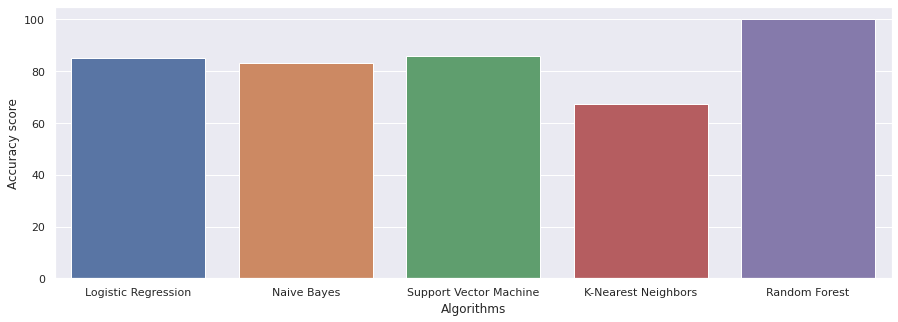

In [56]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

### here Random Forest, has good result as compare to other algorithms <br> <br>

# Ensemble technique and model prediction

Accuracy: 88.06584362139918
Outcome values : 
 83 19 10 131


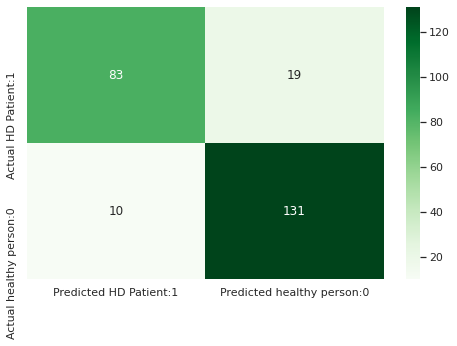

Classification accuracy:  88.06584362139918
Classification error:  11.934156378600823
Specificity:  92.90780141843972
Sensitivity:  81.37254901960785
Matthews’ correlation coefficient: 0.7542172869506781
Precison:  89.24731182795699
Execution time:  2.1140756607055664
Auc is 87.1


In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import matthews_corrcoef
import time
start=time.time()
model = AdaBoostClassifier(n_estimators=100,base_estimator=LogisticRegression()).fit(x,y)
y_pred_lr = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_lr)*100)
end=time.time()
tp, fn, fp, tn  = confusion_matrix(Y_test, y_pred_lr).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
CM=confusion_matrix(Y_test,y_pred_lr)
conf_matrix = pd.DataFrame(data = CM, columns = ['Predicted HD Patient:1', 'Predicted healthy person:0'], 
                           index =['Actual HD Patient:1', 'Actual healthy person:0'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
#print (classification_report(Y_test, y_pred_lr))
c_accuracy_lr=(tp+tn)/(tp+tn+fp+fn)*100
print('Classification accuracy: ',c_accuracy_lr)
c_error=(fp+fn)/(tp+tn+fp+fn)*100
print('Classification error: ',c_error)
specificity_lr=(tn)/(tn+fp)*100
print('Specificity: ',specificity_lr)
sensitivity_lr=(tp)/(tp+fn)*100
print('Sensitivity: ',sensitivity_lr)
mcc=matthews_corrcoef(Y_test, y_pred_lr)
print('Matthews’ correlation coefficient:' , mcc)
precision=tp/(tp+fp)*100
print('Precison: ',precision)
executiontime_lr=end-start
print('Execution time: ',executiontime_lr)
auc = np.round(roc_auc_score(Y_test, y_pred_lr), 3)
print("Auc is {}". format(auc*100))

Accuracy: 72.42798353909465
Outcome values : 
 63 39 28 113


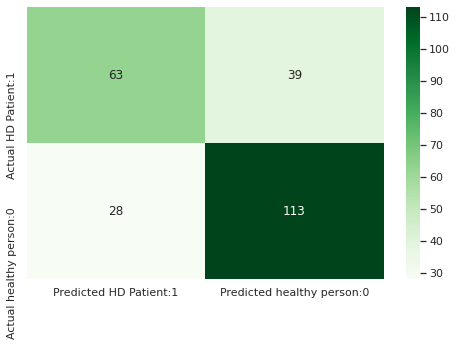

Classification accuracy:  72.42798353909465
Classification error:  27.572016460905353
Specificity:  80.1418439716312
Sensitivity:  61.76470588235294
Matthews’ correlation coefficient: 0.4273159062404711
Precison:  69.23076923076923
Execution time:  0.21764087677001953
Auc is 71.0


In [58]:
start=time.time()
model = AdaBoostClassifier(n_estimators=100,base_estimator=GaussianNB()).fit(x,y)
y_pred_nb = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_nb)*100)
end=time.time()
tp, fn, fp, tn  = confusion_matrix(Y_test, y_pred_nb).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
#print (classification_report(Y_test, y_pred))
CM=confusion_matrix(Y_test,y_pred_nb)
conf_matrix = pd.DataFrame(data = CM, columns = ['Predicted HD Patient:1', 'Predicted healthy person:0'], 
                           index =['Actual HD Patient:1', 'Actual healthy person:0'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
c_accuracy_nb=(tp+tn)/(tp+tn+fp+fn)*100
print('Classification accuracy: ',c_accuracy_nb)
c_error=(fp+fn)/(tp+tn+fp+fn)*100
print('Classification error: ',c_error)
specificity_nb=(tn)/(tn+fp)*100
print('Specificity: ',specificity_nb)
sensitivity_nb=(tp)/(tp+fn)*100
print('Sensitivity: ',sensitivity_nb)
mcc=matthews_corrcoef(Y_test, y_pred_nb)
print('Matthews’ correlation coefficient:' , mcc)
precision=tp/(tp+fp)*100
print('Precison: ',precision)
executiontime_nb=end-start
print('Execution time: ',executiontime_nb)
auc = np.round(roc_auc_score(Y_test, y_pred_nb), 3)
print("Auc is {}". format(auc*100))

Accuracy: 74.48559670781893
Outcome values : 
 67 35 27 114


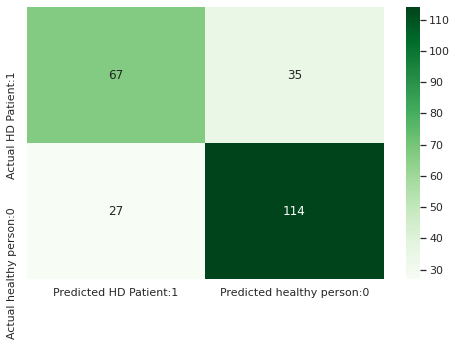

Classification accuracy:  74.48559670781893
Classification error:  25.514403292181072
Specificity:  80.85106382978722
Sensitivity:  65.68627450980392
Precison:  71.27659574468085
Matthews’ correlation coefficient: 0.4715786358157861
Execution time:  24.640384197235107
Auc is 73.3


In [59]:
start=time.time()
model = AdaBoostClassifier(n_estimators=100,base_estimator=svm.SVC(probability=True, kernel='linear')).fit(x,y)
y_pred_svm = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_svm)*100)
end=time.time()
cm = confusion_matrix(Y_test, y_pred_svm)
tp, fn, fp, tn  = confusion_matrix(Y_test, y_pred_svm).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
CM=confusion_matrix(Y_test,y_pred_svm)
conf_matrix = pd.DataFrame(data = CM, columns = ['Predicted HD Patient:1', 'Predicted healthy person:0'], 
                           index =['Actual HD Patient:1', 'Actual healthy person:0'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
c_accuracy_svm=(tp+tn)/(tp+tn+fp+fn)*100
print('Classification accuracy: ',c_accuracy_svm)
c_error=(fp+fn)/(tp+tn+fp+fn)*100
print('Classification error: ',c_error)
specificity_svm=(tn)/(tn+fp)*100
print('Specificity: ',specificity_svm)
sensitivity_svm=(tp)/(tp+fn)*100
print('Sensitivity: ',sensitivity_svm)
precision=tp/(tp+fp)*100
print('Precison: ',precision)
mcc=matthews_corrcoef(Y_test, y_pred_svm)
print('Matthews’ correlation coefficient:' , mcc)
executiontime_svm=end-start
print('Execution time: ',executiontime_svm)
auc = np.round(roc_auc_score(Y_test, y_pred_svm), 3)
print("Auc is {}". format(auc*100))

# KNeighborsClassifier does not support weighted samples hence cannot be used in conjunction with AdaBoostClassifier

In [60]:
import inspect 
from sklearn.utils import all_estimators 
for name, clf in all_estimators(type_filter='classifier'): 
    if 'sample_weight' in inspect.getargspec(clf.fit)[0]: 
        print(name) 

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
HistGradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultiOutputClassifier
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
StackingClassifier
VotingClassifier


Accuracy: 100.0
Outcome values : 
 102 0 0 141


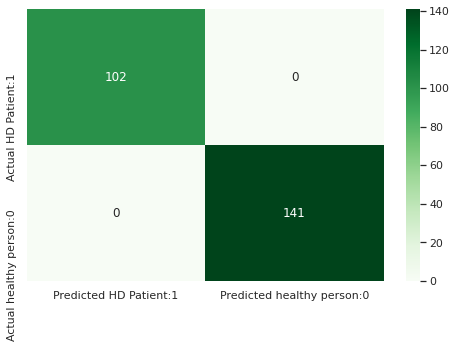

Classification accuracy:  100.0
Classification error:  0.0
Specificity:  100.0
Sensitivity:  100.0
Matthews’ correlation coefficient: 1.0
Precison:  100.0
Execution time:  0.017625808715820312
Auc is 100.0


In [62]:
start=time.time()
model = KNeighborsClassifier(n_neighbors=7).fit(x,y)
y_pred_knn = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_knn)*100)
end=time.time()
tp, fn, fp, tn  = confusion_matrix(Y_test, y_pred_knn).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
CM=confusion_matrix(Y_test,y_pred_knn)
conf_matrix = pd.DataFrame(data = CM, columns = ['Predicted HD Patient:1', 'Predicted healthy person:0'], 
                           index =['Actual HD Patient:1', 'Actual healthy person:0'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
c_accuracy_knn=(tp+tn)/(tp+tn+fp+fn)*100
print('Classification accuracy: ',c_accuracy_knn)
c_error=(fp+fn)/(tp+tn+fp+fn)*100
print('Classification error: ',c_error)
specificity_knn=(tn)/(tn+fp)*100
print('Specificity: ',specificity_knn)
sensitivity_knn=(tp)/(tp+fn)*100
print('Sensitivity: ',sensitivity_knn)

mcc=matthews_corrcoef(Y_test, y_pred_knn)
print('Matthews’ correlation coefficient:' , mcc)
precision=tp/(tp+fp)*100
print('Precison: ',precision)
executiontime_knn=end-start
print('Execution time: ',executiontime_knn)
auc = np.round(roc_auc_score(Y_test, y_pred_knn), 3)
print("Auc is {}". format(auc*100))

Accuracy: 100.0
Outcome values : 
 102 0 0 141


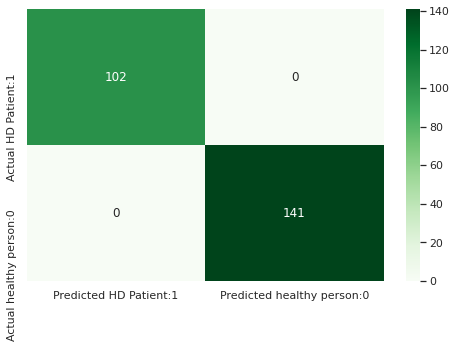

Classification accuracy:  100.0
Classification error:  0.0
Specificity:  100.0
Sensitivity:  100.0
Matthews’ correlation coefficient: 1.0
Precison:  100.0
Execution time:  0.38033008575439453
Auc for our sample data is 100.0


In [63]:
start=time.time()
clf = AdaBoostClassifier(n_estimators=100,base_estimator=RandomForestClassifier(max_features="auto",random_state=0))
clf.fit(X_train, Y_train)
y_pred_rf = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rf)*100)
end=time.time()
tp, fn, fp, tn  = confusion_matrix(Y_test, y_pred_rf).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
CM=confusion_matrix(Y_test,y_pred_rf)
conf_matrix = pd.DataFrame(data = CM, columns = ['Predicted HD Patient:1', 'Predicted healthy person:0'], 
                           index =['Actual HD Patient:1', 'Actual healthy person:0'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
c_accuracy_rf=(tp+tn)/(tp+tn+fp+fn)*100
print('Classification accuracy: ',c_accuracy_rf)
c_error=(fp+fn)/(tp+tn+fp+fn)*100
print('Classification error: ',c_error)
specificity_rf=(tn)/(tn+fp)*100
print('Specificity: ',specificity_rf)
sensitivity_rf=(tp)/(tp+fn)*100
print('Sensitivity: ',sensitivity_rf)
mcc=matthews_corrcoef(Y_test, y_pred_rf)
print('Matthews’ correlation coefficient:' , mcc)
precision=tp/(tp+fp)*100
print('Precison: ',precision)
executiontime=end-start
print('Execution time: ',executiontime)   
auc = np.round(roc_auc_score(Y_test, y_pred_rf), 3)
print("Auc for our sample data is {}". format(auc*100))

## Performance evaluation



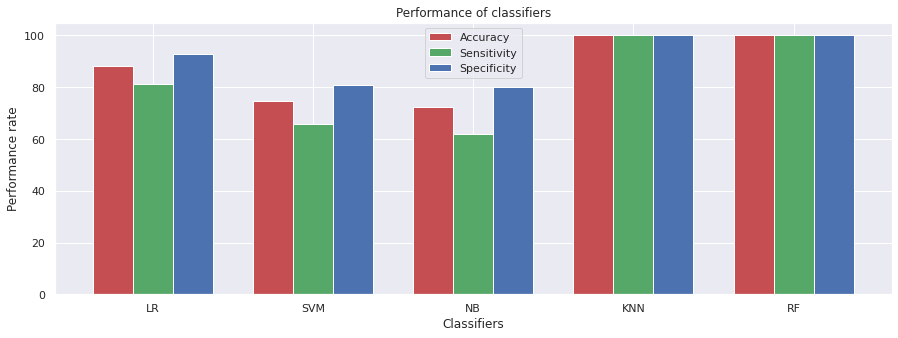

In [64]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
  
xvals = [c_accuracy_lr,c_accuracy_svm,c_accuracy_nb,c_accuracy_knn,c_accuracy_rf]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [sensitivity_lr,sensitivity_svm,sensitivity_nb,sensitivity_knn,sensitivity_rf]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [specificity_lr,specificity_svm,specificity_nb,specificity_knn,specificity_rf]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Classifiers")
plt.ylabel("Performance rate")
plt.title("Performance of classifiers")
  
plt.xticks(ind+width,['LR', 'SVM', 'NB','KNN','RF'])
plt.legend( (bar1, bar2, bar3), ('Accuracy', 'Sensitivity', 'Specificity') )

plt.show()

In [65]:
CM=confusion_matrix(Y_test,y_pred_lr)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
spec= TN/(TN+FP)
specificity =np.round(spec,2)
er=FP+FN/(TP+TN+FP+FN)
c_error=np.round(er,2)
sens=TP/(TP+FN)
sensitivity=np.round(sens,2)
acc= np.round(accuracy_score(Y_test, y_pred_lr),2)
roc=np.round(roc_auc_score(Y_test, y_pred_lr),2)
prec =  np.round(precision_score(Y_test, y_pred_lr),2)
processingtime= np.round(processingtime_lr,2)
mathew =  np.round(matthews_corrcoef(Y_test, y_pred_lr),2)
model_results =pd.DataFrame([['LR',acc,c_error, prec,sensitivity,specificity,roc, mathew,processingtime]],
               columns = ['Model', 'Accuracy','Classification error','Precision','Sensitivity', 'Specificity', 'ROC','mathew_corrcoef','Processing time'])

model_results





,Model,Accuracy,Classification error,Precision,Sensitivity,Specificity,ROC,mathew_corrcoef,Processing time
0,LR,0.88,19.04,0.87,0.93,0.81,0.87,0.75,1.09


# Comparison with other Models

In [66]:
CM=confusion_matrix(Y_test,y_pred_svm)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
spec= TN/(TN+FP)
specificity =np.round(spec,2)
er=FP+FN/(TP+TN+FP+FN)
c_error=np.round(er,2)
sens=TP/(TP+FN)
sensitivity=np.round(sens,2)
acc= np.round(accuracy_score(Y_test, y_pred_svm),2)
roc=np.round(roc_auc_score(Y_test, y_pred_svm),2)
prec =  np.round(precision_score(Y_test, y_pred_svm),2)
processingtime= np.round(processingtime_svm,2)
mathew =  np.round(matthews_corrcoef(Y_test, y_pred_svm),2)
results =pd.DataFrame([['SVM',acc,c_error, prec,sensitivity,specificity,roc, mathew,processingtime]],
               columns = ['Model', 'Accuracy','Classification error','Precision','Sensitivity', 'Specificity', 'ROC','mathew_corrcoef','Processing time'])
model_results = model_results.append(results, ignore_index = True)
model_results


,Model,Accuracy,Classification error,Precision,Sensitivity,Specificity,ROC,mathew_corrcoef,Processing time
0,LR,0.88,19.04,0.87,0.93,0.81,0.87,0.75,1.09
1,SVM,0.74,35.11,0.77,0.81,0.66,0.73,0.47,60.17


In [67]:
CM=confusion_matrix(Y_test,y_pred_nb)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
spec= TN/(TN+FP)
specificity =np.round(spec,2)
er=FP+FN/(TP+TN+FP+FN)
c_error=np.round(er,2)
sens=TP/(TP+FN)
sensitivity=np.round(sens,2)
acc= np.round(accuracy_score(Y_test, y_pred_nb),2)
roc=np.round(roc_auc_score(Y_test, y_pred_nb),2)
prec =  np.round(precision_score(Y_test, y_pred_nb),2)
processingtime= np.round(processingtime_nb,2)
mathew =  np.round(matthews_corrcoef(Y_test, y_pred_nb),2)
results =pd.DataFrame([['NB',acc,c_error, prec,sensitivity,specificity,roc, mathew,processingtime]],
               columns = ['Model', 'Accuracy','Classification error','Precision','Sensitivity', 'Specificity', 'ROC','mathew_corrcoef','Processing time'])
model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Classification error,Precision,Sensitivity,Specificity,ROC,mathew_corrcoef,Processing time
0,LR,0.88,19.04,0.87,0.93,0.81,0.87,0.75,1.09
1,SVM,0.74,35.11,0.77,0.81,0.66,0.73,0.47,60.17
2,NB,0.72,39.12,0.74,0.80,0.62,0.71,0.43,0.10


In [68]:
CM=confusion_matrix(Y_test,y_pred_knn)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
spec= TN/(TN+FP)
specificity =np.round(spec,2)
er=FP+FN/(TP+TN+FP+FN)
c_error=np.round(er,2)
sens=TP/(TP+FN)
sensitivity=np.round(sens,2)
acc= np.round(accuracy_score(Y_test, y_pred_knn),2)
roc=np.round(roc_auc_score(Y_test, y_pred_knn),2)
prec =  np.round(precision_score(Y_test, y_pred_knn),2)
processingtime= np.round(processingtime_knn,2)
mathew =  np.round(matthews_corrcoef(Y_test, y_pred_knn),2)
results =pd.DataFrame([['KNN',acc,c_error, prec,sensitivity,specificity,roc, mathew,processingtime]],
               columns = ['Model', 'Accuracy','Classification error','Precision','Sensitivity', 'Specificity', 'ROC','mathew_corrcoef','Processing time'])
model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Classification error,Precision,Sensitivity,Specificity,ROC,mathew_corrcoef,Processing time
0,LR,0.88,19.04,0.87,0.93,0.81,0.87,0.75,1.09
1,SVM,0.74,35.11,0.77,0.81,0.66,0.73,0.47,60.17
2,NB,0.72,39.12,0.74,0.80,0.62,0.71,0.43,0.10
3,KNN,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.12


In [69]:
CM=confusion_matrix(Y_test,y_pred_rf)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
spec= TN/(TN+FP)
specificity =np.round(spec,2)
er=FP+FN/(TP+TN+FP+FN)
c_error=np.round(er,2)
sens=TP/(TP+FN)
sensitivity=np.round(sens,2)
acc= np.round(accuracy_score(Y_test, y_pred_rf),2)
roc=np.round(roc_auc_score(Y_test, y_pred_rf),2)
prec =  np.round(precision_score(Y_test, y_pred_rf),2)
processingtime= np.round(processingtime_rf,2)
mathew =  np.round(matthews_corrcoef(Y_test, y_pred_rf),2)
results =pd.DataFrame([['RF',acc,c_error, prec,sensitivity,specificity,roc, mathew,processingtime]],
               columns = ['Model', 'Accuracy','Classification error','Precision','Sensitivity', 'Specificity', 'ROC','mathew_corrcoef','Processing time'])
model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Classification error,Precision,Sensitivity,Specificity,ROC,mathew_corrcoef,Processing time
0,LR,0.88,19.04,0.87,0.93,0.81,0.87,0.75,1.09
1,SVM,0.74,35.11,0.77,0.81,0.66,0.73,0.47,60.17
2,NB,0.72,39.12,0.74,0.80,0.62,0.71,0.43,0.10
3,KNN,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.12
4,RF,1.00,0.00,1.00,1.00,1.00,1.00,1.00,9.99


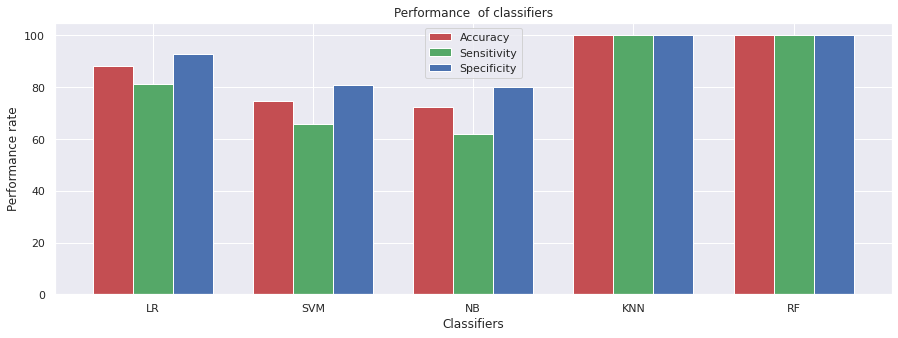

In [70]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
  
xvals = [c_accuracy_lr,c_accuracy_svm,c_accuracy_nb,c_accuracy_knn,c_accuracy_rf]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [sensitivity_lr,sensitivity_svm,sensitivity_nb,sensitivity_knn,sensitivity_rf]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [specificity_lr,specificity_svm,specificity_nb,specificity_knn,specificity_rf]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Classifiers")
plt.ylabel("Performance rate")
plt.title("Performance  of classifiers")
  
plt.xticks(ind+width,['LR', 'SVM', 'NB','KNN','RF'])
plt.legend( (bar1, bar2, bar3), ('Accuracy', 'Sensitivity', 'Specificity') )

plt.show()

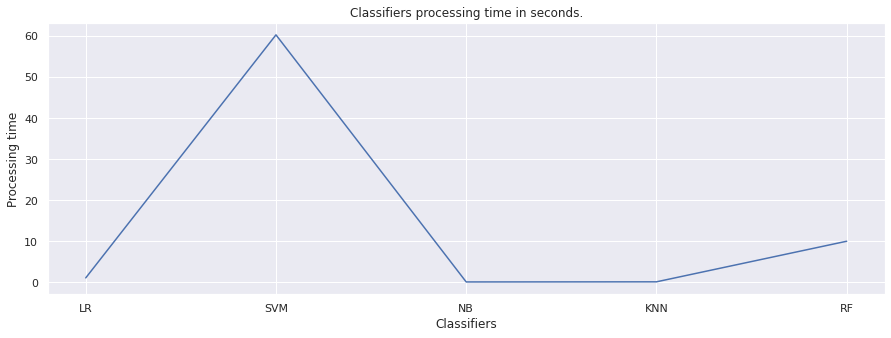

In [71]:
y = [processingtime_lr,processingtime_svm,processingtime_nb,processingtime_knn,processingtime_rf]  # X-axis points
x = ['LR', 'SVM', 'NB','KNN','RF'] # Y-axis points
plt.xlabel("Classifiers")
plt.ylabel("Processing time")
plt.title("Classifiers processing time in seconds.")
plt.plot(x, y)  # Plot the chart
plt.show() 

<AxesSubplot:>

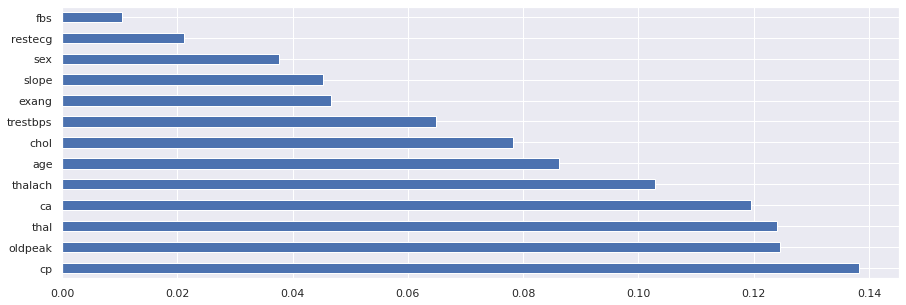

In [74]:
feat_importances = pd.Series(clf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Conclusion  <a id='data-conc'></a>

- As we have seen, knn and random forest machine learning algorithms resulted in higher performance than any individual machine learning model.
- We have also interpreted second best performing algo i.e., random forest algorithm
- The most contributing features are:
1. **cp: chest pain type**<br>
2. **thal:Max heart Rate achieved**<br>
3. **oldpeak: st_depression induced by exercise relative to rest**<br>
4. **ca: number of major vessels colored by flourosopy**<br>
5. **Cholestrol**<br>
6. **Age**<br>
